# Preliminary Cut on energy to reject single Ar39 decays
Single Ar39 decays are low-energy decays (energy deposit <565 KeV) that occur with very high frequency. For this reason, we have to cut them off because the trigger rate cannot much such frequency.

Considering 1.41 Bq/l in a 2.6m3 instrumented volume, the decay rate is 3666 Hz.
However, from the 10M simulations performed with Optical Map, we saw a 64.17% of detection. Then, we expect a trigger rate of 2353 Hz if no cut is performed.

However, in a 10us time window, multiple decays could pileup.
We report the probability of observing from 0 to 7 decays in the same time window approximated wt a Poisson distribution (*>7 decays in the same 10us time window has negligible probability <8e-16*), we note that:
1. P[0 decays | T=10us] = 0.976744672 = 97.67%
1. P[>=1 decays | T=10us] = 1 - 0.976744672 = 0.023255328 = 2.33%

Considering the case `>=1 decays`, we note that the "critical" case (w.r.t. rate) is 1 Ar39 decay because has a dominant probability:
1. P[1 decay | T=10us, >=1 decays] = 0.0229828021 / 0.023255328 = 0.988281141 = 98.83%
1. P[>1 decay | T=10us, >=1 decays] = 1 - 0.988281141 = .011718859 = 1.17%

Then, considering the Ar39 detection rate of 2353 Hz and that the 98.83% of it is related to 1 Ar39 decay, it means that we need to cut as much as possible of this Ar39 to obtain a reasonable trigger rate in the order of O(10Hz) and then eventually try to reduce with the "smart approach".

### Problem 1 Ar39 vs Mu: requirements
Restricting our focus on mu vs Ar39, we evaluate the effect of a cut on NPE.
However, we need to understand the requirement on *False Positive Rate* to choose the best cut.

Considering *FPR=FP/(FP+TN)*, we can observe that the expected trigger rate is
`(FPR * 0.9883 + 0.0117) * 2353`, where the 1.17% contribution depends on the Ar39 pileups. Then, in the following we report the computation for various FPR:

1. *FPR=0.00* => (0.00 * 0.9883 + 0.0117) * 2353 = 28 Hz
1. *FPR=0.01* => (0.01 * 0.9883 + 0.0117) * 2353 = 51 Hz
1. *FPR=0.02* => (0.02 * 0.9883 + 0.0117) * 2353 = 74 Hz
1. *FPR=0.03* => (0.03 * 0.9883 + 0.0117) * 2353 = 97 Hz
1. *FPR=0.04* => (0.04 * 0.9883 + 0.0117) * 2353 = 120 Hz
1. *FPR=0.05* => (0.05 * 0.9883 + 0.0117) * 2353 = 143 Hz
1. *FPR=0.06* => (0.06 * 0.9883 + 0.0117) * 2353 = 167 Hz

Requiring a trigger rate up to 100 Hz, with can define the "dummy" cut on energy to have a `FPR<=3%`. Using a smart approach in this preliminary phase we could try to see if with `FPR<=0.05` we can achieve some result. However, we should consider that:
1. We can use only very fast-inference model (*note: we cannot overload the trigger in this preliminary phase*) 
1. The FPR that we estimate on simulation is not exhaustive because we reach max PE at 60PE, whilst the ideal case can reach 83PE. So it is an underestimation of FPR.

# Performance of cut on PE
In this section, we report some evaluation of cut on the simulation data. Note that:

1. With a cut at 61 PE, we would have a full rejection of the simulated Ar39 (note: 10M simulations, no ideal case).
1. With a cut below 60 PE, we should see if able to classify some pattern to identify muons. However, the resulting approach combined with the PE cut should satisfy the requirement FPR<0.03.

**Note:** The dataset is unbalanced (6M Ar39, 14K muons). This is totally on porpuse because the real-setup is unbalanced (Ar39 has a rate of 2.4 Hz, Mu has a rate 4 per hour). However, the unbalancing is not reflective of the real condition, so the **purity** is clearly *optimistic*.

In [1]:
import os, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 18})

In [2]:
def load_dataframe_from_files(dirin, fileprefix):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {} files wt prefix:\n{}".format(len(files), fileprefix))
    df = pd.read_csv(files[0], comment='#', index_col=False)
    for file in files[1:]:
        print(".", end='')
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    print("")
    return df

In [ ]:
# Create 1 Ar39 dataset (load all data and save them in an output file)
import numpy as np

dirout = "../data/Ar39/dataset_all1ar39"    # where to write combined datasets
outfilename = "Ar39_1Pileup_ALL.csv"
dirin = "../../Development/Out/T10us/Ar39_1to7Pileups"
fileinprefix = "Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp1_Seed123456789_Part*.csv"

if os.path.exists(os.path.join(dirout, outfilename)):
    print("[Info] The output file already exists, we load it!")
    dfKar39 = load_dataframe_from_files(dirout, outfilename)
    print("[Result] Loaded {} events, wt avg {:.2f} PE".format(len(dfKar39), dfKar39.pedetected.mean()))
else:
    print("[Info] The output file does not exists, we load the all input!")
    dfKar39 = load_dataframe_from_files(dirin, fileinprefix)
    dfKar39 = dfKar39[dfKar39.columns[1:-1]]    # remove first (eventnr) and last (unnamed) col
    dfKar39 = dfKar39[dfKar39.pedetected > 0]  # remove zero-detection events
    print("[Result] Produced {} events, wt avg {:.2f} PE".format(len(dfKar39), dfKar39.pedetected.mean()))
    # write output
    dfKar39.to_csv(os.path.join(dirout, "Ar39_1Pileup_ALL.csv"), index=False)
maxPEar39 = dfKar39.pedetected.max()
print("[Info] The Ar39 decays have maximum {} PE detected".format(maxPEar39))

[Info] The output file already exists, we load it!
[Info] Loading 1 files wt prefix:
Ar39_1Pileup_ALL.csv


In [4]:
# Load Muons and select the ones that fall in the same energy range
filein = os.path.join("..", "data", "Muons", "LowEnergyMuons_wt_0ar39_ALL.csv")
muons = pd.read_csv(filein, index_col=False)
print("[Info] Loaded {} muons (<={} PE)".format(len(muons), muons.pedetected.max()))
lemuons = muons[muons.pedetected <= maxPEar39]
print("[Info] Loaded {} low-energy muons (<={} PE)".format(len(lemuons), maxPEar39))

[Info] Loaded 14836 muons (<=865951 PE)
[Info] Loaded 4631 low-energy muons (<=60 PE)


In [5]:
tprs, fprs, thresholds = [], [], list(range(61, -1, -1))
effs, purs = [], []
for pe_threshold in thresholds:
    print(".", end="")
    tp = len(muons[muons.pedetected>=pe_threshold])
    fn = len(muons[muons.pedetected<pe_threshold])
    tn = len(dfKar39[dfKar39.pedetected<pe_threshold])
    fp = len(dfKar39[dfKar39.pedetected>=pe_threshold])
    # compute the rate
    eff = tpr = tp / (tp + fn)    # efficiency (recall or TPR)
    fpr = fp / (fp + tn)          # FPR
    pur = tp / (tp + fp)          # purity (or precision)
    tprs.append(tpr)
    fprs.append(fpr)
    effs.append(eff)
    purs.append(pur)

..............................................................

Cut: 10 PE => TPR=0.79785656511189, FPR=0.06591041944838587
Cut: 15 PE => TPR=0.7715017524939337, FPR=0.021984457877004582
Cut: 20 PE => TPR=0.7531679698031815, FPR=0.0069940821499535274
Cut: 30 PE => TPR=0.7286330547317337, FPR=0.0005284473980860504
Cut: 40 PE => TPR=0.7096926395254786, FPR=2.7737940811355374e-05


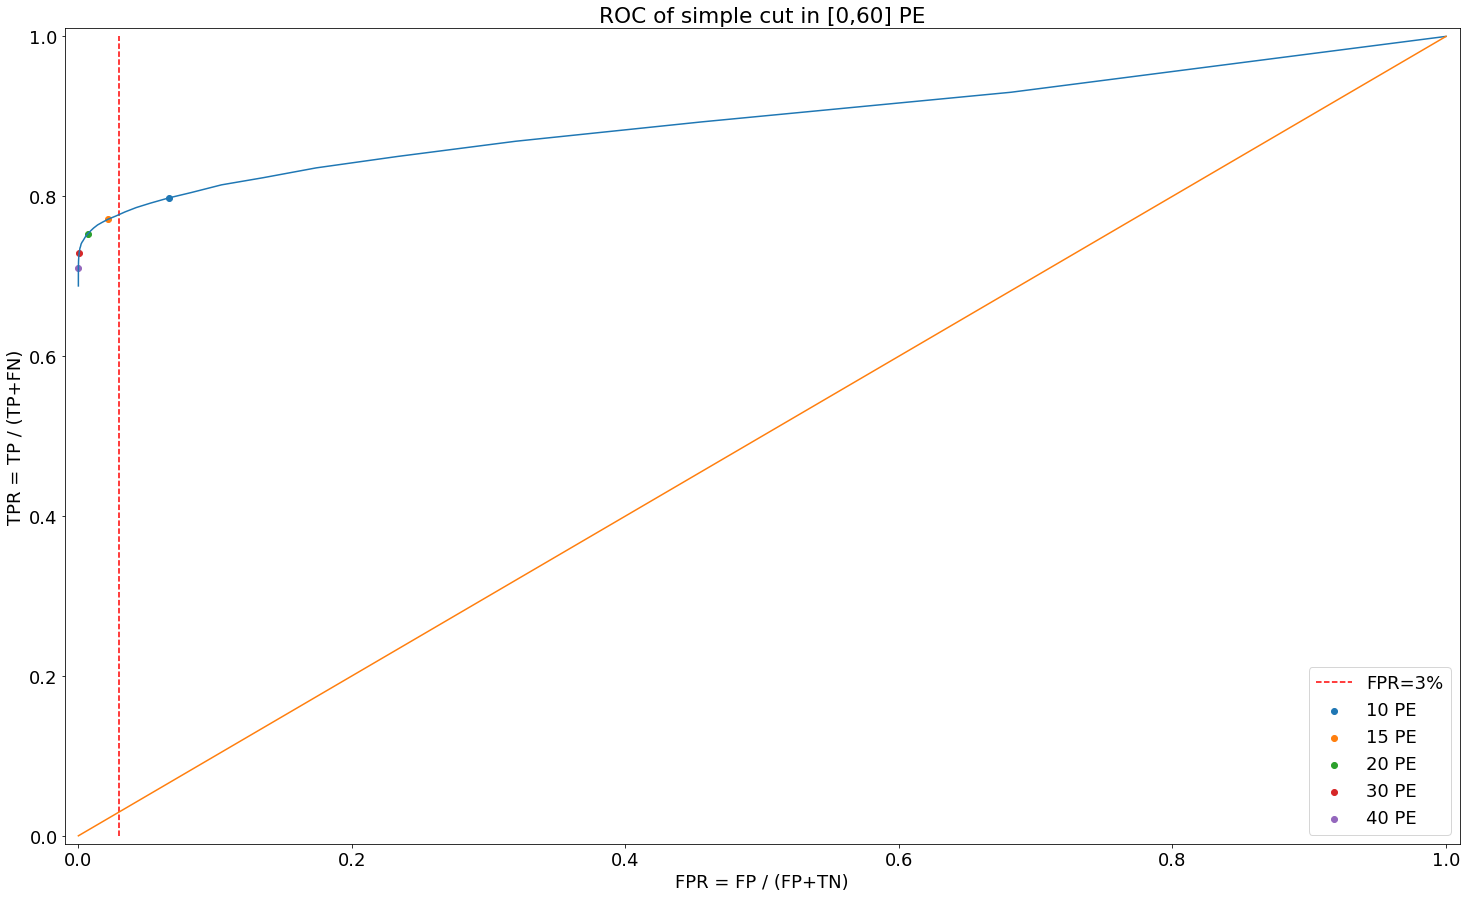

In [21]:
plt.plot(fprs, tprs)
plt.plot(np.arange(61)/60, np.arange(61)/60)
plt.vlines(0.03, ymin=0, ymax=1, label="FPR=3%", color='r', linestyles='dashed')
highlight_thresholds = [10, 15, 20, 30, 40]
for pe_threshold in highlight_thresholds:
    id_threshold = thresholds.index(pe_threshold)
    plt.scatter(fprs[id_threshold], tprs[id_threshold], label="{} PE".format(pe_threshold))
    print("Cut: {} PE => TPR={}, FPR={}".format(pe_threshold, tprs[id_threshold], fprs[id_threshold]))
plt.xlabel("FPR = FP / (FP+TN)")
plt.ylabel("TPR = TP / (TP+FN)")
plt.title("ROC of simple cut in [0,60] PE")
plt.legend()
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
plt.show()

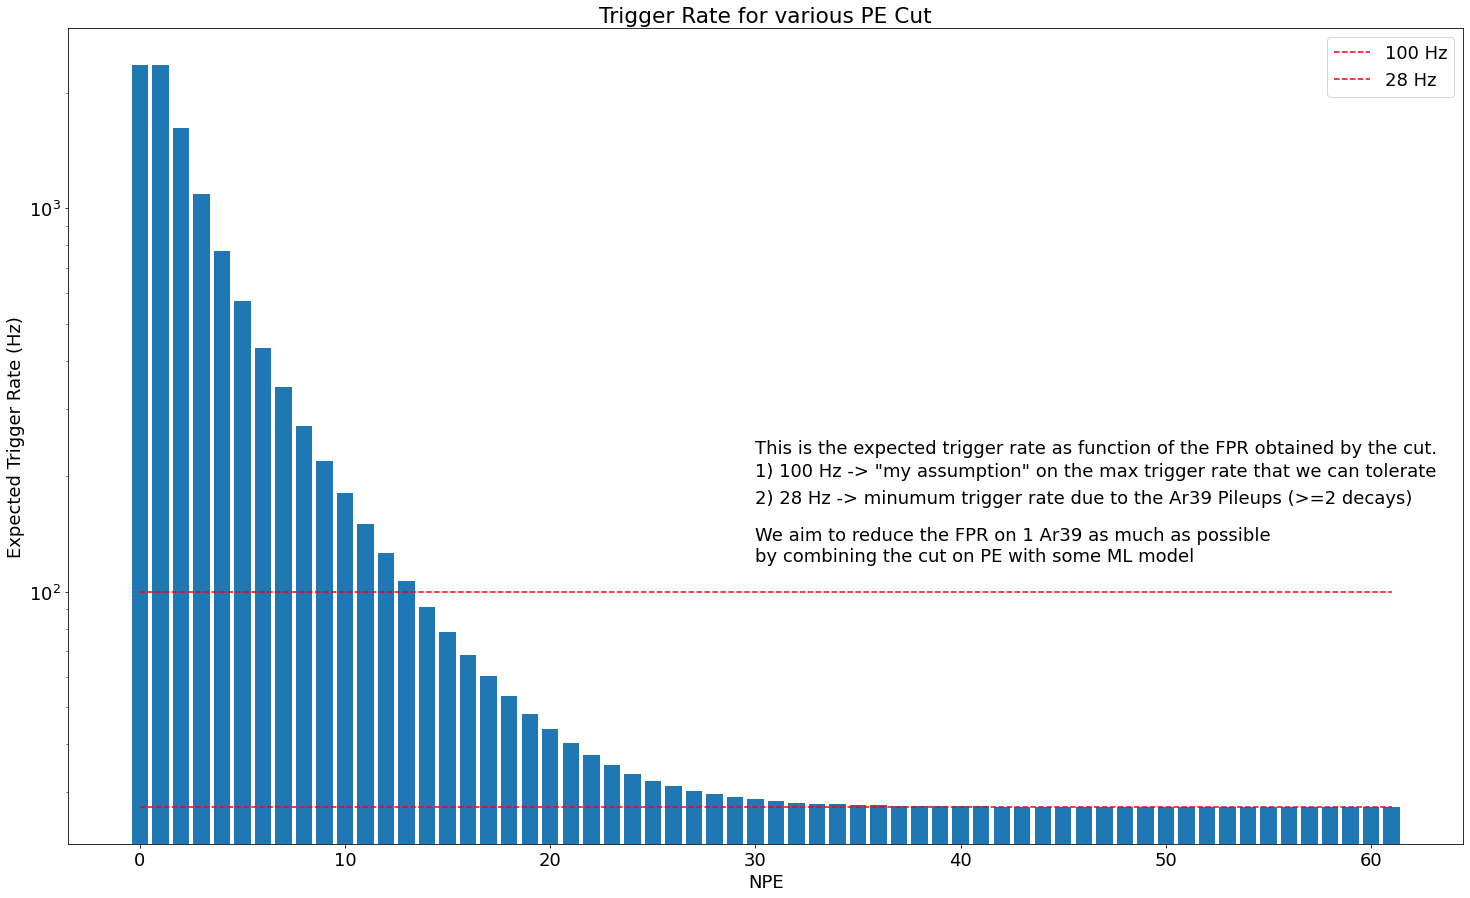

In [37]:
plt.hlines(100, xmin=0, xmax=61, label="100 Hz", color='r', linestyles='dashed')
plt.hlines(0.0117*2353, xmin=0, xmax=61, label="{} Hz".format(round(0.0117*2353)), color='r', linestyles='dashed')
plt.bar(thresholds, (np.array(fprs)*0.9883+0.0117)*2353)
plt.xlabel("NPE")
plt.ylabel("Expected Trigger Rate (Hz)")
plt.title("Trigger Rate for various PE Cut")
plt.legend()
plt.yscale("log")
plt.text(30, 230, "This is the expected trigger rate as function of the FPR obtained by the cut.")
plt.text(30, 200, "1) 100 Hz -> \"my assumption\" on the max trigger rate that we can tolerate")
plt.text(30, 170, "2) 28 Hz -> minumum trigger rate due to the Ar39 Pileups (>=2 decays)")
plt.text(30, 120, "We aim to reduce the FPR on 1 Ar39 as much as possible\n" \
                  "by combining the cut on PE with some ML model")
plt.show()

# Other consideration (Precision/Recall Curve)
Even if this curve is biased by the not-realistic proportion of Mu and Ar39 instances, we report the Precision (=purity) vs Recall (=efficiency) Curve.

**Some observations on this curve:**
1. from 0 PE to 10 PE we loose a lot in *efficiency* (-20%). The reason is that there are a lot of low-energy/unseen muons. Unfortunately, with <=10 PE there is not so much to do in classification and the Ar39 rate is dominant, so the best classification is to reject them as Ar39 background.
1. from 20 PE to 40 PE we improve a lot in *purity* reaching 98%, loosing only 5% in efficiency.

Cut: 0 PE => Efficiency=1.0, Purity=0.002346026587457961
Cut: 10 PE => Efficiency=0.79785656511189, Purity=0.027677947197482164
Cut: 20 PE => Efficiency=0.7531679698031815, Purity=0.2020614828209765
Cut: 30 PE => Efficiency=0.7286330547317337, Purity=0.7642816742081447
Cut: 40 PE => Efficiency=0.7096926395254786, Purity=0.9836509715994021
Cut: 61 PE => Efficiency=0.6878538689673767, Purity=1.0


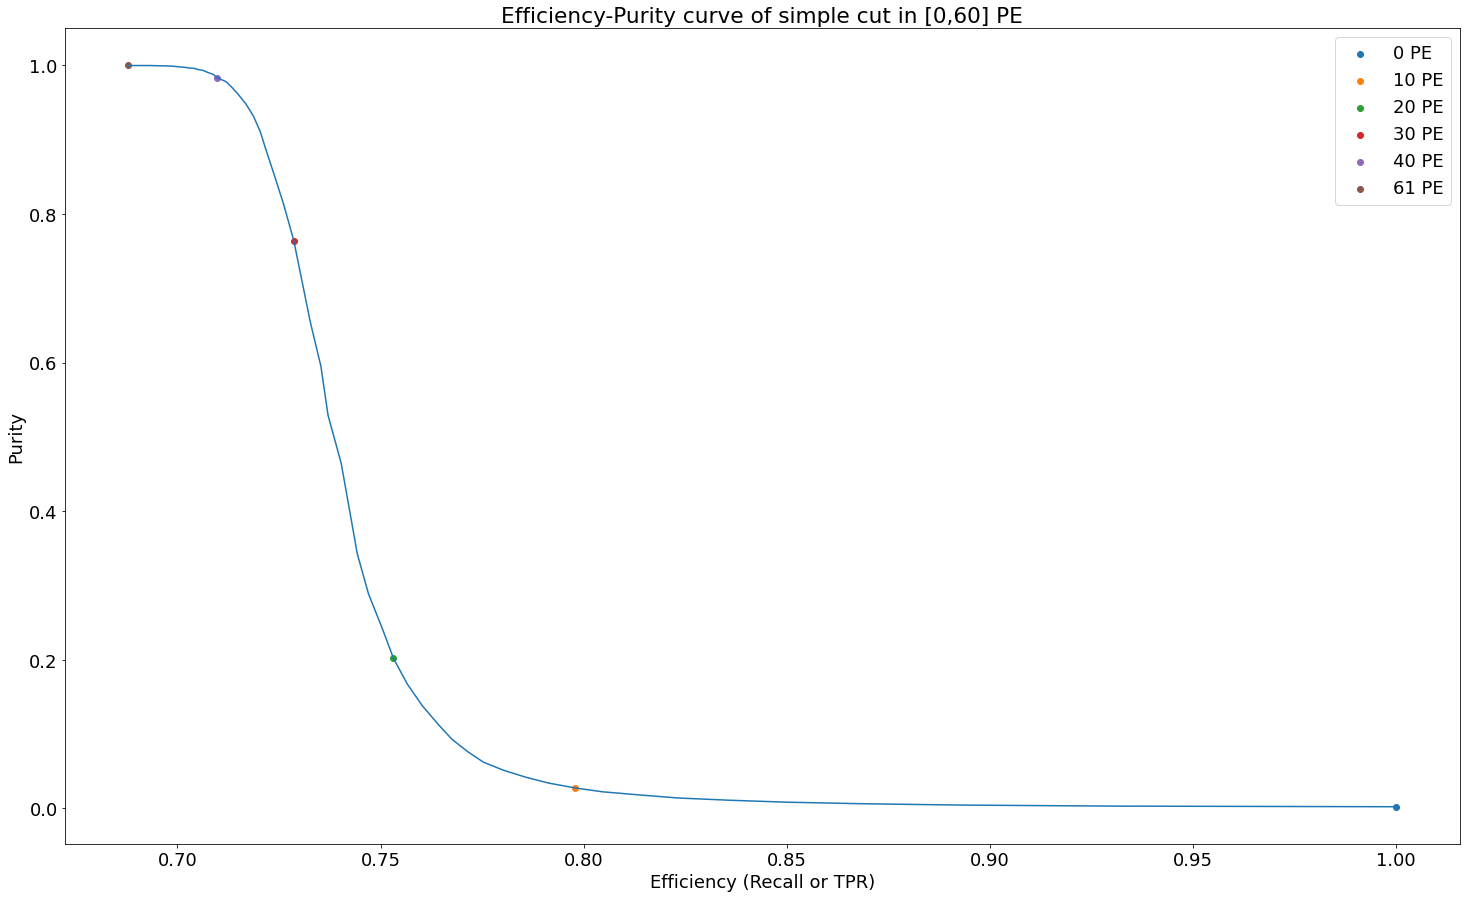

In [39]:
plt.plot(effs, purs)
highlight_thresholds = [0, 10, 20, 30, 40, 61]
for pe_threshold in highlight_thresholds:
    id_threshold = thresholds.index(pe_threshold)
    plt.scatter(effs[id_threshold], purs[id_threshold], label="{} PE".format(pe_threshold))
    print("Cut: {} PE => Efficiency={}, Purity={}".format(pe_threshold, effs[id_threshold], purs[id_threshold]))
plt.xlabel("Efficiency (Recall or TPR)")
plt.ylabel("Purity")
plt.title("Efficiency-Purity curve of simple cut in [0,60] PE")
plt.legend()
plt.show()

# Integro 2 Ar39 in roc


In [9]:
import os, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 18})

In [35]:
dirin = "/home/luigi/Development/ML4NP/ML4GeneralMuons/data/Ar39"
file_1ar = "Ar39_1Pileup_cut117PE_n1000000.csv"
file_2ar = "Ar39_2Pileup_cut117PE_n1000000.csv"
file_3ar = "Ar39_3Pileup_cut117PE_n1000000.csv"

df_1ar39 = pd.read_csv(os.path.join(dirin, file_1ar))
df_2ar39 = pd.read_csv(os.path.join(dirin, file_2ar))
df_3ar39 = pd.read_csv(os.path.join(dirin, file_3ar))

In [20]:
filein = os.path.join("..", "data", "Muons", "LowEnergyMuons_wt_0ar39_ALL.csv")
muons = pd.read_csv(filein, index_col=False)

..............................................................
Cut: 10 PE => TPR=0.79785656511189, FPR=0.065742
Cut: 15 PE => TPR=0.7715017524939337, FPR=0.021764
Cut: 20 PE => TPR=0.7531679698031815, FPR=0.006946
Cut: 30 PE => TPR=0.7286330547317337, FPR=0.000511
Cut: 40 PE => TPR=0.7096926395254786, FPR=3.1e-05


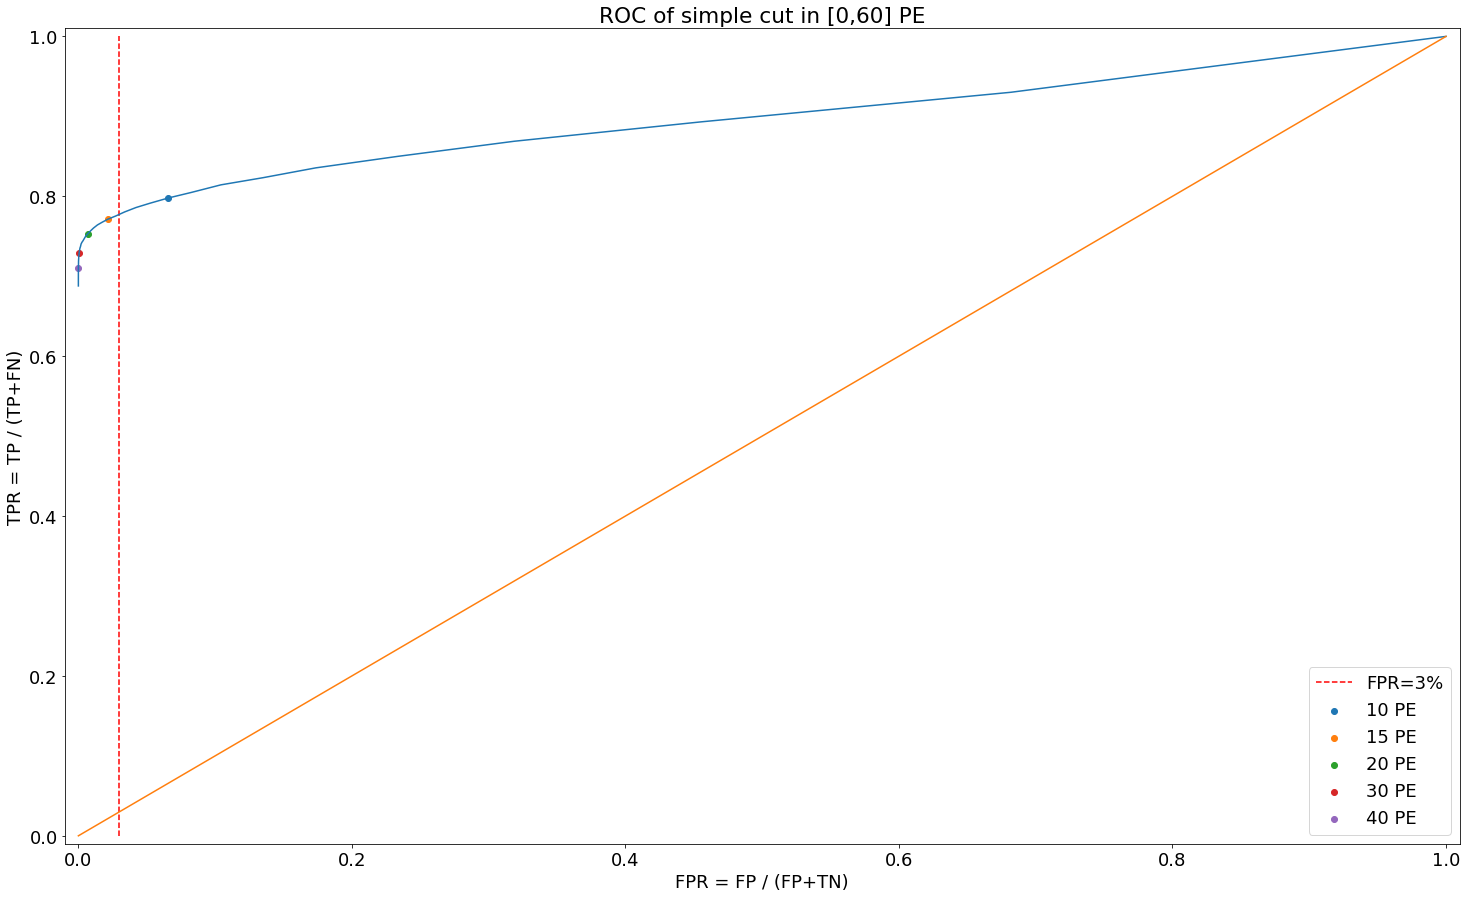

In [21]:
tprs, fprs, thresholds = [], [], list(range(61, -1, -1))
effs, purs = [], []
for pe_threshold in thresholds:
    print(".", end="")
    tp = len(muons[muons.pedetected>=pe_threshold])
    fn = len(muons[muons.pedetected<pe_threshold])
    tn = len(df_1ar39[df_1ar39.pedetected<pe_threshold])
    fp = len(df_1ar39[df_1ar39.pedetected>=pe_threshold])
    # compute the rate
    eff = tpr = tp / (tp + fn)    # efficiency (recall or TPR)
    fpr = fp / (fp + tn)          # FPR
    pur = tp / (tp + fp)          # purity (or precision)
    tprs.append(tpr)
    fprs.append(fpr)
    effs.append(eff)
    purs.append(pur)
print()
plt.plot(fprs, tprs)
plt.plot(np.arange(61)/60, np.arange(61)/60)
plt.vlines(0.03, ymin=0, ymax=1, label="FPR=3%", color='r', linestyles='dashed')
highlight_thresholds = [10, 15, 20, 30, 40]
for pe_threshold in highlight_thresholds:
    id_threshold = thresholds.index(pe_threshold)
    plt.scatter(fprs[id_threshold], tprs[id_threshold], label="{} PE".format(pe_threshold))
    print("Cut: {} PE => TPR={}, FPR={}".format(pe_threshold, tprs[id_threshold], fprs[id_threshold]))
plt.xlabel("FPR = FP / (FP+TN)")
plt.ylabel("TPR = TP / (TP+FN)")
plt.title("ROC of simple cut in [0,60] PE")
plt.legend()
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
plt.show()

..............................................................
Cut: 10 PE => TPR=0.79785656511189, FPR=0.22102
Cut: 15 PE => TPR=0.7715017524939337, FPR=0.08503
Cut: 20 PE => TPR=0.7531679698031815, FPR=0.03253
Cut: 30 PE => TPR=0.7286330547317337, FPR=0.00383
Cut: 40 PE => TPR=0.7096926395254786, FPR=0.00035


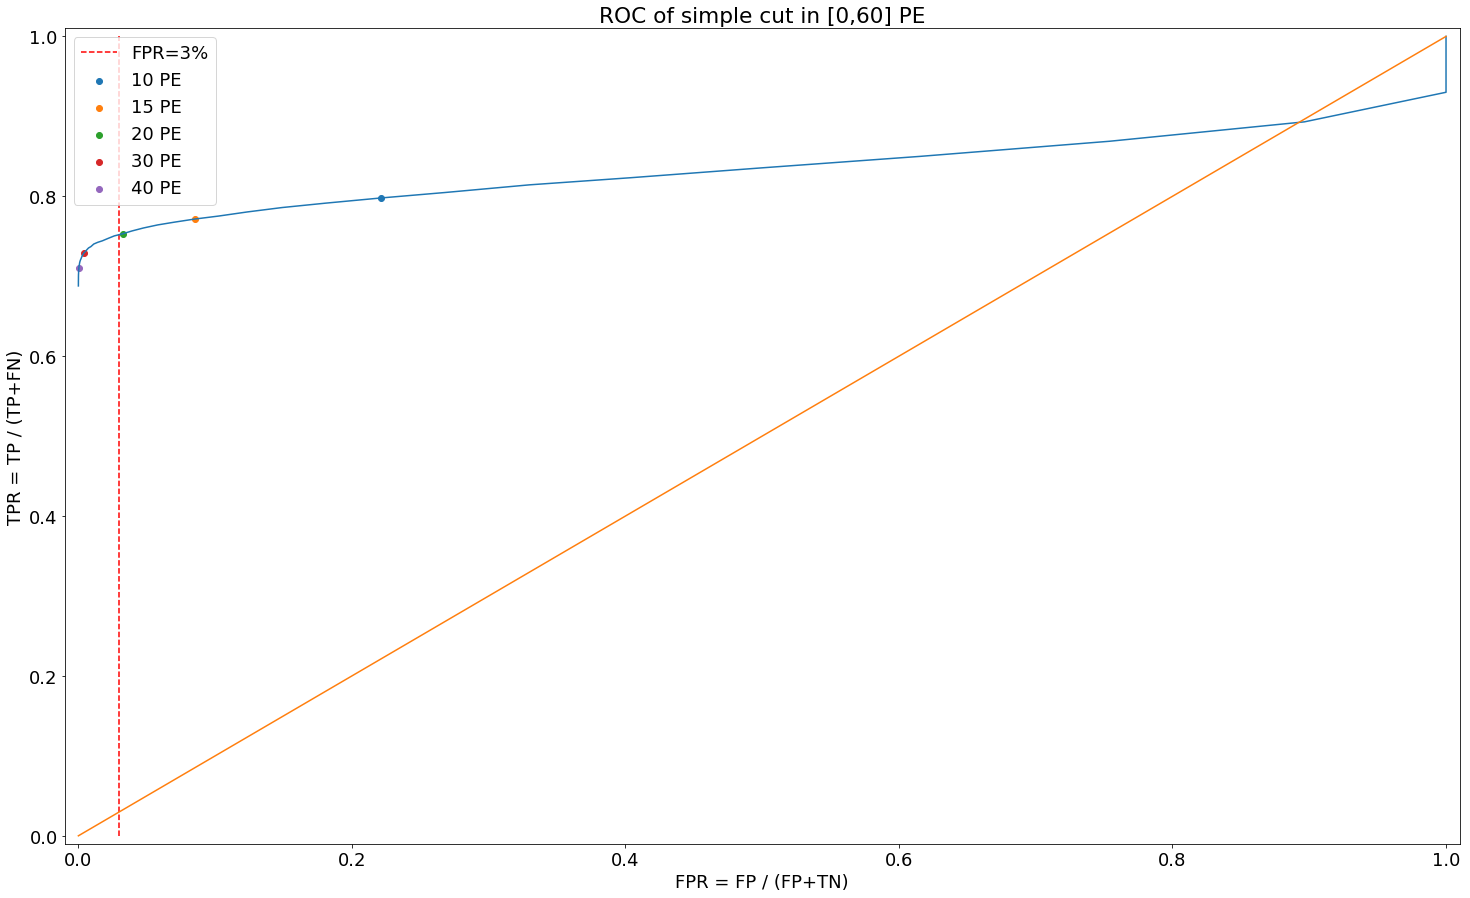

In [22]:
tprs, fprs, thresholds = [], [], list(range(61, -1, -1))
effs, purs = [], []
for pe_threshold in thresholds:
    print(".", end="")
    tp = len(muons[muons.pedetected>=pe_threshold])
    fn = len(muons[muons.pedetected<pe_threshold])
    tn = len(df_2ar39[df_2ar39.pedetected<pe_threshold])
    fp = len(df_2ar39[df_2ar39.pedetected>=pe_threshold])
    # compute the rate
    eff = tpr = tp / (tp + fn)    # efficiency (recall or TPR)
    fpr = fp / (fp + tn)          # FPR
    pur = tp / (tp + fp)          # purity (or precision)
    tprs.append(tpr)
    fprs.append(fpr)
    effs.append(eff)
    purs.append(pur)
print()
plt.plot(fprs, tprs)
plt.plot(np.arange(61)/60, np.arange(61)/60)
plt.vlines(0.03, ymin=0, ymax=1, label="FPR=3%", color='r', linestyles='dashed')
highlight_thresholds = [10, 15, 20, 30, 40]
for pe_threshold in highlight_thresholds:
    id_threshold = thresholds.index(pe_threshold)
    plt.scatter(fprs[id_threshold], tprs[id_threshold], label="{} PE".format(pe_threshold))
    print("Cut: {} PE => TPR={}, FPR={}".format(pe_threshold, tprs[id_threshold], fprs[id_threshold]))
plt.xlabel("FPR = FP / (FP+TN)")
plt.ylabel("TPR = TP / (TP+FN)")
plt.title("ROC of simple cut in [0,60] PE")
plt.legend()
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
plt.show()

..............................................................
Cut: 10 PE => TPR=0.79785656511189, FPR=0.45737
Cut: 15 PE => TPR=0.7715017524939337, FPR=0.20644
Cut: 20 PE => TPR=0.7531679698031815, FPR=0.08912
Cut: 30 PE => TPR=0.7286330547317337, FPR=0.01389
Cut: 40 PE => TPR=0.7096926395254786, FPR=0.00167


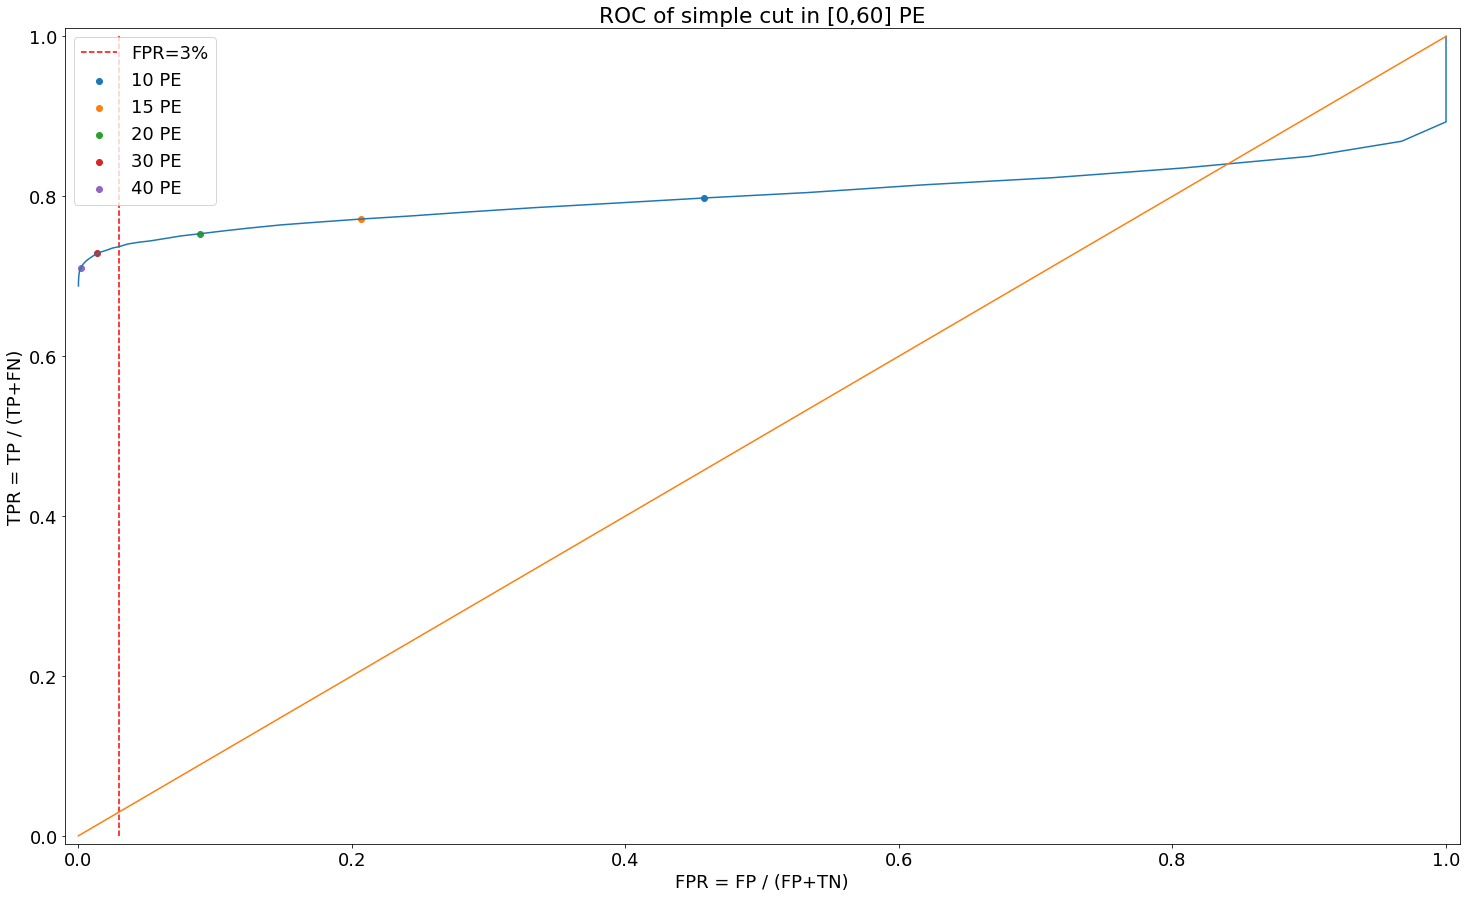

In [37]:
tprs, fprs, thresholds = [], [], list(range(61, -1, -1))
effs, purs = [], []
for pe_threshold in thresholds:
    print(".", end="")
    tp = len(muons[muons.pedetected>=pe_threshold])
    fn = len(muons[muons.pedetected<pe_threshold])
    tn = len(df_3ar39[df_3ar39.pedetected<pe_threshold])
    fp = len(df_3ar39[df_3ar39.pedetected>=pe_threshold])
    # compute the rate
    eff = tpr = tp / (tp + fn)    # efficiency (recall or TPR)
    fpr = fp / (fp + tn)          # FPR
    pur = tp / (tp + fp)          # purity (or precision)
    tprs.append(tpr)
    fprs.append(fpr)
    effs.append(eff)
    purs.append(pur)
print()
plt.plot(fprs, tprs)
plt.plot(np.arange(61)/60, np.arange(61)/60)
plt.vlines(0.03, ymin=0, ymax=1, label="FPR=3%", color='r', linestyles='dashed')
highlight_thresholds = [10, 15, 20, 30, 40]
for pe_threshold in highlight_thresholds:
    id_threshold = thresholds.index(pe_threshold)
    plt.scatter(fprs[id_threshold], tprs[id_threshold], label="{} PE".format(pe_threshold))
    print("Cut: {} PE => TPR={}, FPR={}".format(pe_threshold, tprs[id_threshold], fprs[id_threshold]))
plt.xlabel("FPR = FP / (FP+TN)")
plt.ylabel("TPR = TP / (TP+FN)")
plt.title("ROC of simple cut in [0,60] PE")
plt.legend()
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
plt.show()

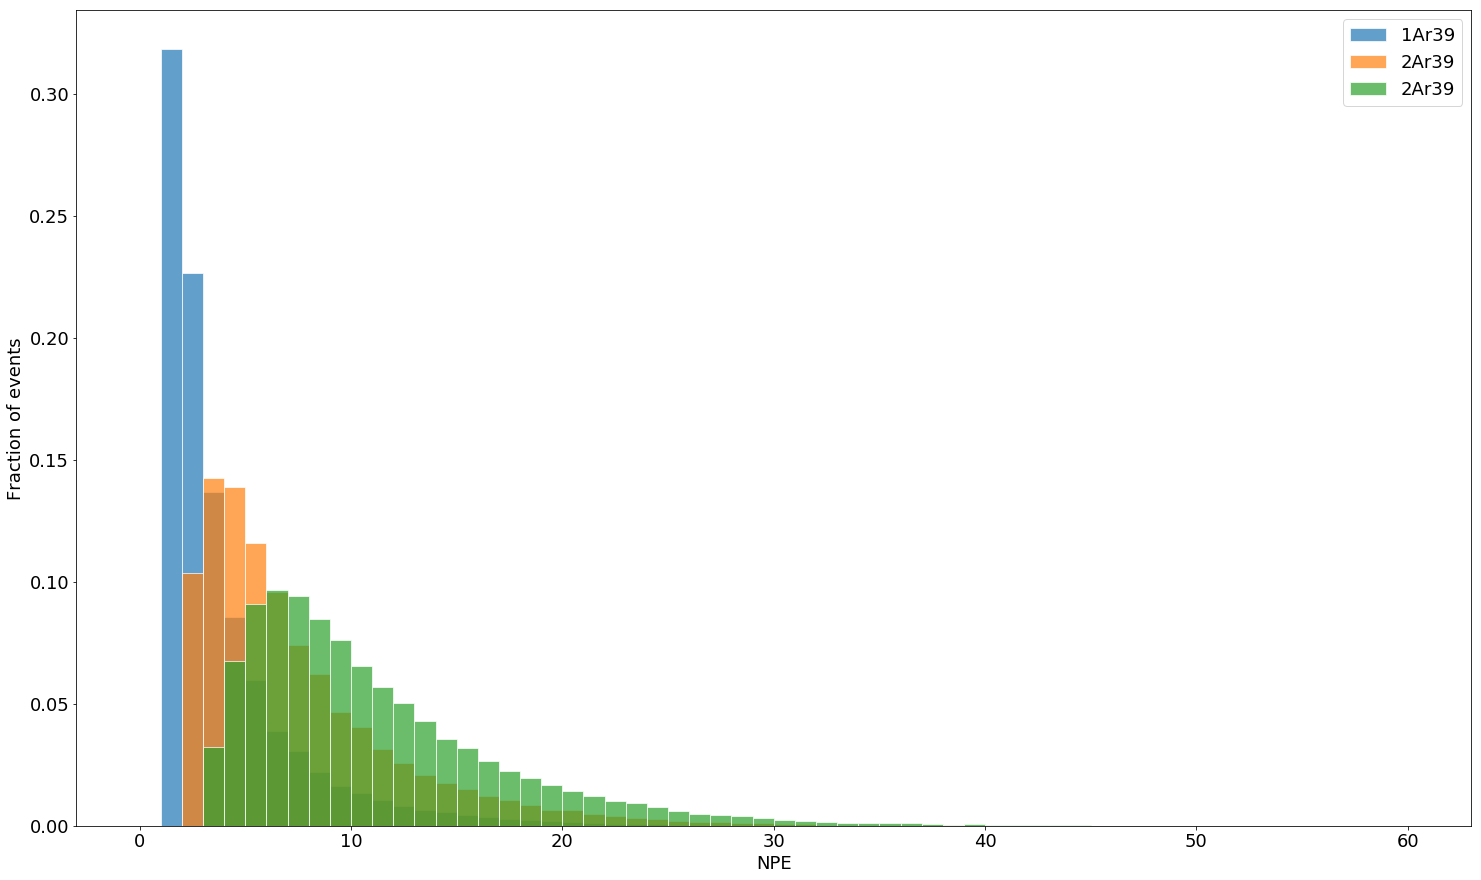

In [36]:
bins = np.linspace(0, 60, 61)
plt.hist(df_1ar39.pedetected, bins=bins, density=True, alpha=0.7, edgecolor='w', label="1Ar39")
plt.hist(df_2ar39.pedetected, bins=bins, density=True, alpha=0.7, edgecolor='w', label="2Ar39")
plt.hist(df_3ar39.pedetected, bins=bins, density=True, alpha=0.7, edgecolor='w', label="2Ar39")
plt.xlabel("NPE")
plt.ylabel("Fraction of events")
plt.legend()
plt.show()

In [25]:
len(df_2ar39)

100000

In [17]:
df_1ar39.head()

,pedetected,slice0,slice1,slice2,slice3,slice4,slice5,slice6,slice7,slice8,...,slice62,slice63,slice64,slice65,slice66,slice67,slice68,slice69,slice70,slice71
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_2ar39.head()

,pedetected,slice0,slice1,slice2,slice3,slice4,slice5,slice6,slice7,slice8,...,slice62,slice63,slice64,slice65,slice66,slice67,slice68,slice69,slice70,slice71
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
